<a href="https://colab.research.google.com/github/abhikbhattacharjee/Bayesian_Modelling_Dissertation/blob/main/Half_Moons_Data/Empirical_Comparison/EmpericalPriorComp_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepbayes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 981.9 kB/s eta 0:00:00


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
import deepbayes
import deepbayes.optimizers as optimizers
import numpy as np
from deepbayes import PosteriorModel
import seaborn as sns

from matplotlib import font_manager
font_path = '/content/NewCM10-Regular.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [ ]:
def my_predict(model, input, n=35):
    if(model.det):
        return model.model(input)
    out = []
    for i in range(n):
        model.model.set_weights(model.sample())
        out.append(model.model(input).numpy())
    return np.mean(out,axis=0), np.var(out,axis=0)

<Axes: >

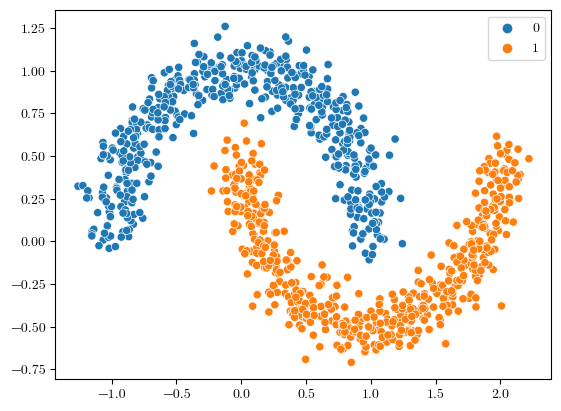

In [ ]:
n_samples = 1000
noise = 0.1
x, y = datasets.make_moons(n_samples = n_samples, noise = noise)

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x, y)

KNeighborsClassifier()

In [ ]:
y_pred = neigh.predict(x)

acc_scr = accuracy_score(y, y_pred)

print("Accuracy Score: ", acc_scr)

cnf_matrix = metrics.confusion_matrix(y, y_pred)
print("Confusion Matrix: \n", cnf_matrix)

Accuracy Score:  1.0
Confusion Matrix: 
 [[500   0]
 [  0 500]]


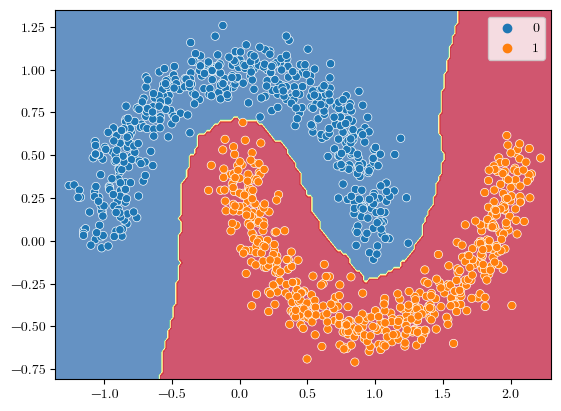

In [ ]:
h = 0.02
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral_r, alpha=0.8)
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='tab10')
plt.show()

<Axes: >

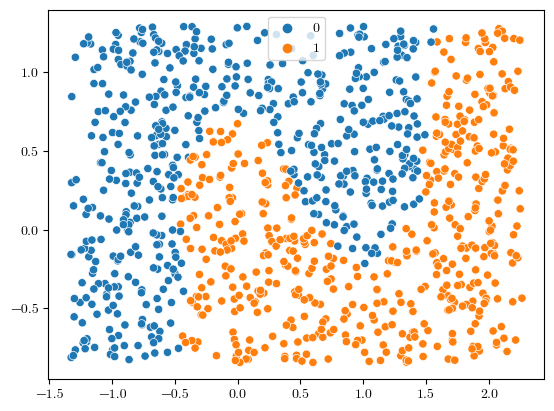

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_samples = 1000

x_samples = np.random.uniform(x_min, x_max, num_samples)
y_samples = np.random.uniform(y_min, y_max, num_samples)

samples = np.column_stack((x_samples, y_samples))

knn_target = neigh.predict(samples)

sns.scatterplot(x=samples[:, 0], y=samples[:, 1], hue=knn_target, palette='tab10')

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(samples, knn_target, test_size = 0.25, random_state=42)
y_train_new = y_train_new.astype("int64").reshape(-1,1)
y_test_new = y_test_new.astype("int64").reshape(-1,1)

In [ ]:
model_new = Sequential()
model_new.add(Dense(10, input_dim = 2, activation = 'relu'))
model_new.add(Dense(2, activation = 'softmax'))

loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = optimizers.BayesByBackprop()
learning_rate = 0.6

bayes_model_knn_prior = opt.compile(model_new, loss_fn = loss, epochs = 20, learning_rate = learning_rate, kl_weight = 0.1)

This optimizer does not have a default compilation method. Please make sure to call the correct .compile method before use.
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


In [ ]:
 bayes_model_knn_prior.train(X_train_new, y_train_new, X_test_new, y_test_new)

100%|██████████| 12/12 [00:05<00:00,  2.33it/s]


Epoch 1, loss: 1.134, acc: 0.477, val_loss: 0.612, val_acc: 0.656


100%|██████████| 12/12 [00:02<00:00,  4.28it/s]


Epoch 2, loss: 0.937, acc: 0.605, val_loss: 1.303, val_acc: 0.484


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 3, loss: 0.700, acc: 0.715, val_loss: 0.613, val_acc: 0.556


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 4, loss: 0.806, acc: 0.703, val_loss: 0.441, val_acc: 0.752


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 5, loss: 0.709, acc: 0.752, val_loss: 0.670, val_acc: 0.636


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


Epoch 6, loss: 0.843, acc: 0.684, val_loss: 0.596, val_acc: 0.716


100%|██████████| 12/12 [00:02<00:00,  4.10it/s]


Epoch 7, loss: 0.651, acc: 0.761, val_loss: 0.497, val_acc: 0.660


100%|██████████| 12/12 [00:01<00:00, 10.50it/s]


Epoch 8, loss: 0.651, acc: 0.771, val_loss: 0.495, val_acc: 0.772


100%|██████████| 12/12 [00:01<00:00, 10.28it/s]


Epoch 9, loss: 0.716, acc: 0.747, val_loss: 0.653, val_acc: 0.668


100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


Epoch 10, loss: 0.594, acc: 0.799, val_loss: 0.507, val_acc: 0.628


100%|██████████| 12/12 [00:01<00:00, 10.30it/s]


Epoch 11, loss: 0.725, acc: 0.737, val_loss: 0.611, val_acc: 0.692


100%|██████████| 12/12 [00:01<00:00, 10.33it/s]


Epoch 12, loss: 0.674, acc: 0.779, val_loss: 0.556, val_acc: 0.768


100%|██████████| 12/12 [00:01<00:00,  9.50it/s]


Epoch 13, loss: 0.571, acc: 0.805, val_loss: 0.464, val_acc: 0.744


100%|██████████| 12/12 [00:01<00:00, 10.28it/s]


Epoch 14, loss: 0.593, acc: 0.797, val_loss: 0.509, val_acc: 0.728


100%|██████████| 12/12 [00:01<00:00, 10.53it/s]


Epoch 15, loss: 0.665, acc: 0.745, val_loss: 0.659, val_acc: 0.696


100%|██████████| 12/12 [00:01<00:00, 10.05it/s]


Epoch 16, loss: 0.600, acc: 0.763, val_loss: 0.438, val_acc: 0.736


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 17, loss: 0.682, acc: 0.771, val_loss: 0.704, val_acc: 0.736


100%|██████████| 12/12 [00:01<00:00,  9.49it/s]


Epoch 18, loss: 0.662, acc: 0.777, val_loss: 0.546, val_acc: 0.756


100%|██████████| 12/12 [00:02<00:00,  4.71it/s]


Epoch 19, loss: 0.660, acc: 0.764, val_loss: 0.696, val_acc: 0.696


100%|██████████| 12/12 [00:01<00:00,  9.46it/s]

Epoch 20, loss: 0.660, acc: 0.756, val_loss: 0.660, val_acc: 0.676


In [ ]:
prediction_mean,prediction_variance = my_predict(bayes_model_knn_prior,X_train_new)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.9599848  0.04001515]
 [0.10631961 0.8936803 ]
 [0.5929695  0.40703052]
 ...
 [0.04076713 0.95923287]
 [0.9880083  0.01199169]
 [0.02814561 0.97185427]]
Prediction Variance:  [[0.00996758 0.00996759]
 [0.02027255 0.02027255]
 [0.03578153 0.03578153]
 ...
 [0.00245307 0.00245307]
 [0.00046795 0.00046795]
 [0.0024385  0.0024385 ]]


In [ ]:
bayes_model_knn_prior.save("PosteriorModels/model")
del bayes_model_knn_prior

/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/mean", np.asarray(self.posterior_mean))
/usr/local/lib/python3.10/dist-packages/deepbayes/optimizers/bayesbybackprop.py:191: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(path+"/var", np.asarray(var))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

y_train = y_train.astype("float32").reshape(-1,1)
y_test = y_test.astype("float32").reshape(-1,1)

In [ ]:
retrain_model = PosteriorModel("PosteriorModels/model")

bayes_model = opt.compile(model_new, loss_fn=loss, learning_rate = 0.8, epochs=50)
bayes_model.posterior_mean = retrain_model.posterior_mean.tolist()
bayes_model.posterior_var = retrain_model.posterior_var.tolist()
bayes_model.train(X_train, y_train, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
BayesKeras detected the above model 
 None
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
BayesKeras: Using implicit prior
(2, 10) 0.7071067811865476
(10, 2) 0.31622776601683794
deepbayes: Using passed loss_fn as the data likelihood in the KL loss


100%|██████████| 13/13 [00:01<00:00,  9.76it/s]


Epoch 1, loss: 2.237, acc: 0.626, val_loss: 0.492, val_acc: 0.855


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 2, loss: 1.780, acc: 0.631, val_loss: 0.333, val_acc: 0.680


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 3, loss: 2.242, acc: 0.663, val_loss: 0.696, val_acc: 0.830


100%|██████████| 13/13 [00:01<00:00, 10.44it/s]


Epoch 4, loss: 2.201, acc: 0.656, val_loss: 1.393, val_acc: 0.520


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 5, loss: 2.590, acc: 0.577, val_loss: 1.976, val_acc: 0.520


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 6, loss: 2.647, acc: 0.596, val_loss: 0.501, val_acc: 0.765


100%|██████████| 13/13 [00:01<00:00,  9.89it/s]


Epoch 7, loss: 2.711, acc: 0.640, val_loss: 0.601, val_acc: 0.790


100%|██████████| 13/13 [00:01<00:00, 10.25it/s]


Epoch 8, loss: 3.294, acc: 0.606, val_loss: 0.329, val_acc: 0.850


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 9, loss: 2.383, acc: 0.637, val_loss: 0.321, val_acc: 0.835


100%|██████████| 13/13 [00:01<00:00, 10.59it/s]


Epoch 10, loss: 2.159, acc: 0.675, val_loss: 0.448, val_acc: 0.830


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 11, loss: 1.880, acc: 0.656, val_loss: 1.396, val_acc: 0.450


100%|██████████| 13/13 [00:01<00:00, 10.36it/s]


Epoch 12, loss: 1.875, acc: 0.709, val_loss: 0.356, val_acc: 0.815


100%|██████████| 13/13 [00:02<00:00,  5.10it/s]


Epoch 13, loss: 2.466, acc: 0.569, val_loss: 0.674, val_acc: 0.775


100%|██████████| 13/13 [00:01<00:00, 10.08it/s]


Epoch 14, loss: 2.214, acc: 0.624, val_loss: 2.117, val_acc: 0.210


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 15, loss: 2.229, acc: 0.697, val_loss: 0.187, val_acc: 0.895


100%|██████████| 13/13 [00:01<00:00, 10.73it/s]


Epoch 16, loss: 2.771, acc: 0.625, val_loss: 0.381, val_acc: 0.850


100%|██████████| 13/13 [00:01<00:00, 10.54it/s]


Epoch 17, loss: 1.902, acc: 0.757, val_loss: 1.190, val_acc: 0.510


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 18, loss: 2.092, acc: 0.720, val_loss: 1.183, val_acc: 0.480


100%|██████████| 13/13 [00:01<00:00, 10.07it/s]


Epoch 19, loss: 2.673, acc: 0.640, val_loss: 1.055, val_acc: 0.745


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 20, loss: 2.075, acc: 0.689, val_loss: 1.329, val_acc: 0.480


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 21, loss: 2.853, acc: 0.618, val_loss: 0.429, val_acc: 0.795


100%|██████████| 13/13 [00:01<00:00, 10.55it/s]


Epoch 22, loss: 2.112, acc: 0.623, val_loss: 0.333, val_acc: 0.855


100%|██████████| 13/13 [00:01<00:00, 10.31it/s]


Epoch 23, loss: 2.071, acc: 0.644, val_loss: 0.307, val_acc: 0.855


100%|██████████| 13/13 [00:01<00:00, 10.59it/s]


Epoch 24, loss: 2.560, acc: 0.595, val_loss: 0.518, val_acc: 0.680


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 25, loss: 2.354, acc: 0.585, val_loss: 0.274, val_acc: 0.855


100%|██████████| 13/13 [00:01<00:00, 10.62it/s]


Epoch 26, loss: 1.963, acc: 0.663, val_loss: 0.975, val_acc: 0.525


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 27, loss: 2.527, acc: 0.658, val_loss: 0.229, val_acc: 0.875


100%|██████████| 13/13 [00:01<00:00, 10.35it/s]


Epoch 28, loss: 2.043, acc: 0.623, val_loss: 0.569, val_acc: 0.610


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 29, loss: 1.977, acc: 0.626, val_loss: 0.996, val_acc: 0.485


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 30, loss: 2.697, acc: 0.636, val_loss: 0.484, val_acc: 0.770


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 31, loss: 2.198, acc: 0.652, val_loss: 1.100, val_acc: 0.330


100%|██████████| 13/13 [00:01<00:00, 10.45it/s]


Epoch 32, loss: 2.015, acc: 0.611, val_loss: 0.697, val_acc: 0.545


100%|██████████| 13/13 [00:01<00:00, 10.62it/s]


Epoch 33, loss: 2.410, acc: 0.675, val_loss: 1.165, val_acc: 0.550


100%|██████████| 13/13 [00:01<00:00, 10.55it/s]


Epoch 34, loss: 2.642, acc: 0.642, val_loss: 0.943, val_acc: 0.810


100%|██████████| 13/13 [00:01<00:00, 10.71it/s]


Epoch 35, loss: 2.389, acc: 0.652, val_loss: 0.306, val_acc: 0.865


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 36, loss: 2.659, acc: 0.706, val_loss: 0.734, val_acc: 0.770


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 37, loss: 2.001, acc: 0.544, val_loss: 1.030, val_acc: 0.520


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 38, loss: 1.995, acc: 0.639, val_loss: 0.252, val_acc: 0.880


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 39, loss: 2.764, acc: 0.575, val_loss: 0.530, val_acc: 0.770


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 40, loss: 2.315, acc: 0.621, val_loss: 0.331, val_acc: 0.845


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 41, loss: 2.349, acc: 0.601, val_loss: 0.439, val_acc: 0.830


100%|██████████| 13/13 [00:05<00:00,  2.55it/s]


Epoch 42, loss: 2.694, acc: 0.609, val_loss: 1.269, val_acc: 0.595


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 43, loss: 2.387, acc: 0.645, val_loss: 0.878, val_acc: 0.675


100%|██████████| 13/13 [00:01<00:00, 10.28it/s]


Epoch 44, loss: 2.189, acc: 0.696, val_loss: 2.203, val_acc: 0.520


100%|██████████| 13/13 [00:01<00:00, 10.29it/s]


Epoch 45, loss: 2.448, acc: 0.650, val_loss: 0.198, val_acc: 0.880


100%|██████████| 13/13 [00:01<00:00, 10.56it/s]


Epoch 46, loss: 3.008, acc: 0.649, val_loss: 1.718, val_acc: 0.480


100%|██████████| 13/13 [00:01<00:00, 10.39it/s]


Epoch 47, loss: 2.440, acc: 0.726, val_loss: 6.267, val_acc: 0.480


100%|██████████| 13/13 [00:01<00:00,  8.56it/s]


Epoch 48, loss: 2.078, acc: 0.661, val_loss: 0.764, val_acc: 0.615


100%|██████████| 13/13 [00:02<00:00,  5.11it/s]


Epoch 49, loss: 1.722, acc: 0.702, val_loss: 0.478, val_acc: 0.745


100%|██████████| 13/13 [00:01<00:00, 10.30it/s]


Epoch 50, loss: 2.365, acc: 0.639, val_loss: 0.308, val_acc: 0.885


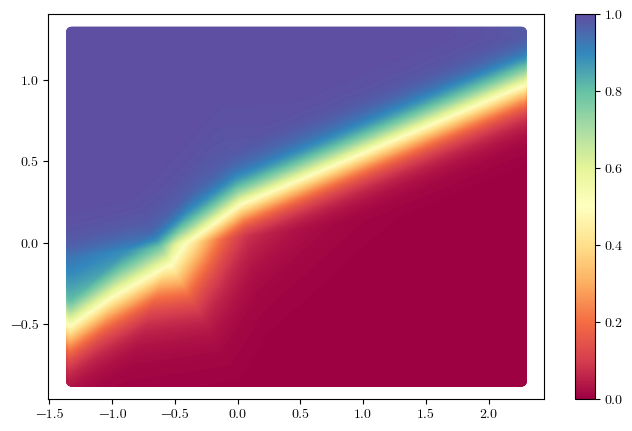

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
num_points = 1000

x = np.linspace(x_min, x_max, num_points)
y = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x, y)
samples = np.column_stack((X.flatten(), Y.flatten()))

test2 = bayes_model.predict(samples)
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=test2[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

In [ ]:
prediction_mean,prediction_variance = my_predict(bayes_model,samples)
print("Prediction Mean: ", prediction_mean)
print("Prediction Variance: ", prediction_variance)

Prediction Mean:  [[0.66239303 0.33760694]
 [0.6615865  0.3384134 ]
 [0.6607653  0.33923477]
 ...
 [0.4698844  0.5301156 ]
 [0.4691052  0.53089476]
 [0.46832755 0.5316725 ]]
Prediction Variance:  [[0.15483673 0.15483673]
 [0.15512237 0.15512237]
 [0.15542276 0.15542276]
 ...
 [0.14826708 0.14826708]
 [0.14834908 0.14834908]
 [0.14843333 0.14843334]]


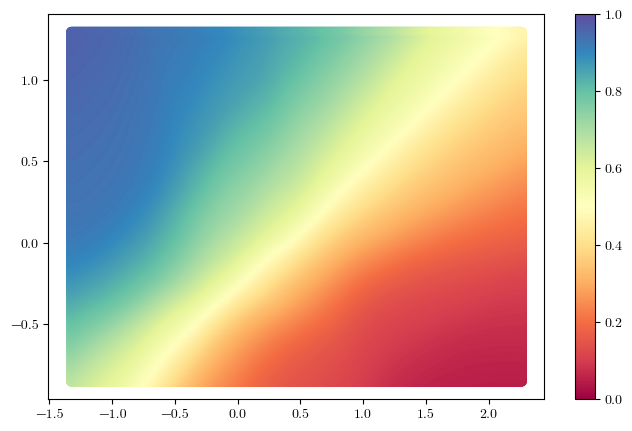

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_mean[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 1)
plt.colorbar(scatter)

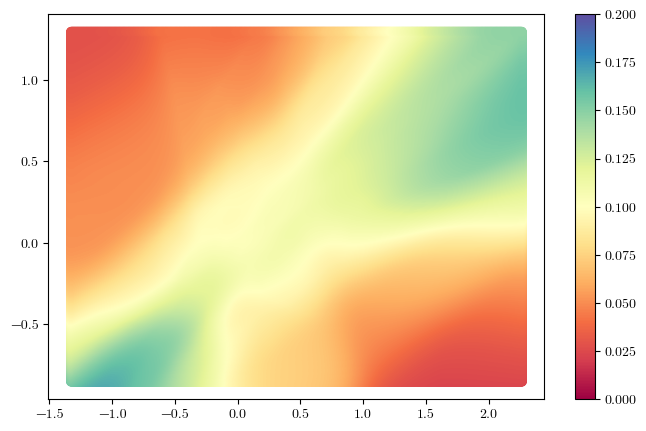

In [ ]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(*samples.T, c=prediction_variance[:, 0], cmap=plt.cm.Spectral, vmin = 0, vmax = 0.2)
plt.colorbar(scatter)

In [ ]:
test3 = bayes_model.predict(X_test)
test3 = tf.where(test3[:, 0] > test3[:, 1], 0, 1)
test3 = tf.expand_dims(test3, axis=1)
print("Accuracy Score: ", accuracy_score(y_test, test3))

Accuracy Score:  0.85
